In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1=pd.read_csv(r"C:\Users\AISHWARYA\Downloads\Sep-2021.csv", encoding='latin-1')
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
KARNATAKA STATE ROAD TRANSPORT CORPORATION,DIVISIONWISE OPERATIONAL RESULTS FOR THE MONTH...,NaN,NaN,Sl.No.,NaN,1,NaN,2,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,Factor,Physical performance,Schedules,(As on last day),Fleet Held,(As on last day),Fleet Utilisation (%),...,MDY,CJR,HSN,CKM,MNG,PTR,DVG,SMG,CDG,KBS
Unnamed: 2,NaN,NaN,NaN,BNG©,NaN,556,NaN,738,NaN,60.4,...,Mandya,Chamarajanagar,Hassan,Chikkamagaluru,Mangaluru,Puttur,Davanagere,Shivamoga,Chitradurga,Kempegowda Bus Station is a Division with just...
Unnamed: 3,NaN,NaN,NaN,RMN,NaN,449,NaN,503,NaN,81.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,TMK,NaN,568,NaN,619,NaN,85.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held (As on last day)','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')

In [4]:
print(D1.columns)

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')


In [5]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')
D1['Fleet Utilisation (%)'] = pd.to_numeric(D1['Fleet Utilisation (%)'], errors='coerce')
D1['Schedules'] = pd.to_numeric(D1['Schedules'], errors='coerce')


FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Schedules']
EffPassDensity=np.multiply(FleetUtilisation, FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [6]:
D1.info

<bound method DataFrame.info of Unnamed: 1   Schedules  Fleet Utilisation (%) % off road  vehicles  \
Unnamed: 2         556                   60.4                  6.2   
Unnamed: 3         449                   81.5                  5.9   
Unnamed: 4         568                   85.3                  5.1   
Unnamed: 5         504                   81.4                  1.8   
Unnamed: 6         518                   85.3                  2.6   
Unnamed: 7         372                   76.9                    6   
Unnamed: 8         588                   79.3                  6.3   
Unnamed: 9         397                   82.3                  7.8   
Unnamed: 10        424                   81.6                    6   
Unnamed: 11        484                   86.0                  7.7   
Unnamed: 12        479                   88.1                  4.6   
Unnamed: 13        446                   64.4                  7.5   
Unnamed: 14        470                   78.3             

In [7]:
D1.head()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,556,60.4,6.2,54.66,57.39,1,335.824
Unnamed: 3,449,81.5,5.9,34.43,39.48,2,365.935
Unnamed: 4,568,85.3,5.1,55.43,54.49,3,484.504
Unnamed: 5,504,81.4,1.8,42.41,44.45,4,410.256
Unnamed: 6,518,85.3,2.6,44.17,50.42,5,441.854


In [8]:
D1.tail()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 14,470,78.3,5.1,37.38,39.06,13,368.010
Unnamed: 15,324,91.8,4.4,32.27,32.56,14,297.432
Unnamed: 16,297,77.8,9.9,30.47,31.48,15,231.066
Unnamed: 17,257,87.2,6.9,27.28,27.79,16,224.104
Unnamed: 19,7133,79.5,5.8,647.93,675.24,17,5670.735


In [9]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Unnamed: 2 to Unnamed: 19
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       17 non-null     int64  
 1   Fleet Utilisation (%)           17 non-null     float64
 2   % off road  vehicles            17 non-null     object 
 3   Schedule kms (in lakh)          17 non-null     object 
 4   Effective Kilometers (in lakh)  17 non-null     object 
 5   City_Id                         17 non-null     int64  
 6   EffPassDensity                  17 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


In [10]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,556,60.4,6.2,54.66,57.39,1,335.824
Unnamed: 3,449,81.5,5.9,34.43,39.48,2,365.935
Unnamed: 4,568,85.3,5.1,55.43,54.49,3,484.504
Unnamed: 5,504,81.4,1.8,42.41,44.45,4,410.256
Unnamed: 6,518,85.3,2.6,44.17,50.42,5,441.854
Unnamed: 7,372,76.9,6,17.32,17.26,6,286.068
Unnamed: 8,588,79.3,6.3,58.04,60.9,7,466.284
Unnamed: 9,397,82.3,7.8,35.96,36.56,8,326.731
Unnamed: 10,424,81.6,6,40.62,43.12,9,345.984
Unnamed: 11,484,86.0,7.7,46.04,46.92,10,416.240


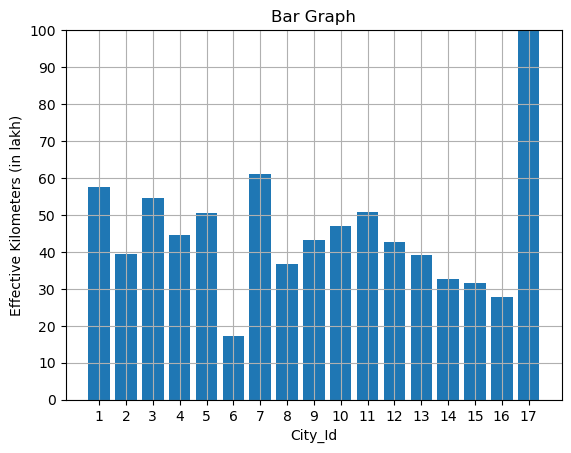

In [31]:
X=D1['City_Id']
Y=D1['Effective Kilometers (in lakh)']
plt.bar(X,Y)
plt.title("Bar Graph")
plt.xlabel('City_Id')
plt.ylabel('Effective Kilometers (in lakh)')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()

In [12]:
import scipy
print(scipy.__version__)

1.10.1


In [13]:
X=D1['City_Id']
Y=D1['Schedules']
'''
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Schedules')% of road vehicles
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()
'''

"\nplt.bar(X,Y)\nplt.xlabel('City ID')\nplt.ylabel('Schedules')% of road vehicles\nplt.xticks(X)  # Set x-axis ticks to match city IDs\n# Set y-axis range with a step of 10\nplt.ylim(0, 1000)  # Set the y-axis range from 0 to 100\nplt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10\nplt.grid(True)\nplt.show()\n"

In [14]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,556,60.4,6.2,54.66,57.39,1,335.824
Unnamed: 3,449,81.5,5.9,34.43,39.48,2,365.935
Unnamed: 4,568,85.3,5.1,55.43,54.49,3,484.504
Unnamed: 5,504,81.4,1.8,42.41,44.45,4,410.256
Unnamed: 6,518,85.3,2.6,44.17,50.42,5,441.854
Unnamed: 7,372,76.9,6,17.32,17.26,6,286.068
Unnamed: 8,588,79.3,6.3,58.04,60.9,7,466.284
Unnamed: 9,397,82.3,7.8,35.96,36.56,8,326.731
Unnamed: 10,424,81.6,6,40.62,43.12,9,345.984
Unnamed: 11,484,86.0,7.7,46.04,46.92,10,416.240


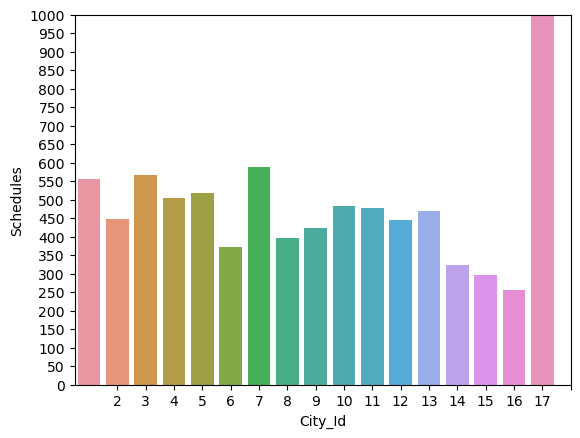

In [15]:
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

In [16]:
meanEPD=np.mean(D1['Schedules'])
print('Mean of Schedules:',meanEPD)

D1['Schedules'].values

Mean of Schedules: 839.1764705882352


array([ 556,  449,  568,  504,  518,  372,  588,  397,  424,  484,  479,
        446,  470,  324,  297,  257, 7133], dtype=int64)

In [17]:
std_by_city = D1['Schedules'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 2639247.404411765
Standard deviation: 1624.5760691367348


In [18]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['Schedules'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'Schedules':D1['Schedules'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,Schedules,Mean Variations
0,1,556,-283.176471
1,2,449,-390.176471
2,3,568,-271.176471
3,4,504,-335.176471
4,5,518,-321.176471
5,6,372,-467.176471
6,7,588,-251.176471
7,8,397,-442.176471
8,9,424,-415.176471
9,10,484,-355.176471


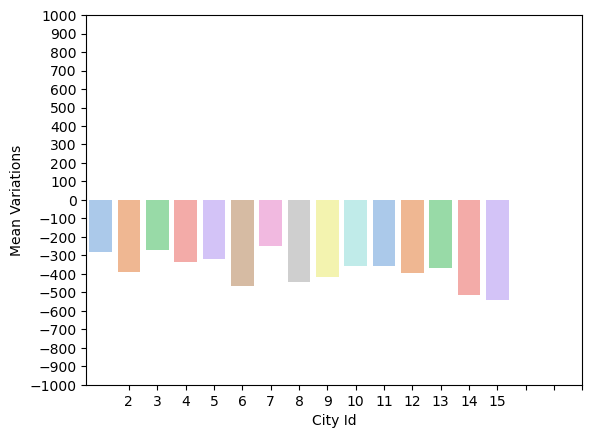

In [19]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_3452\2940990524.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=D1['Schedules'], shade=True)


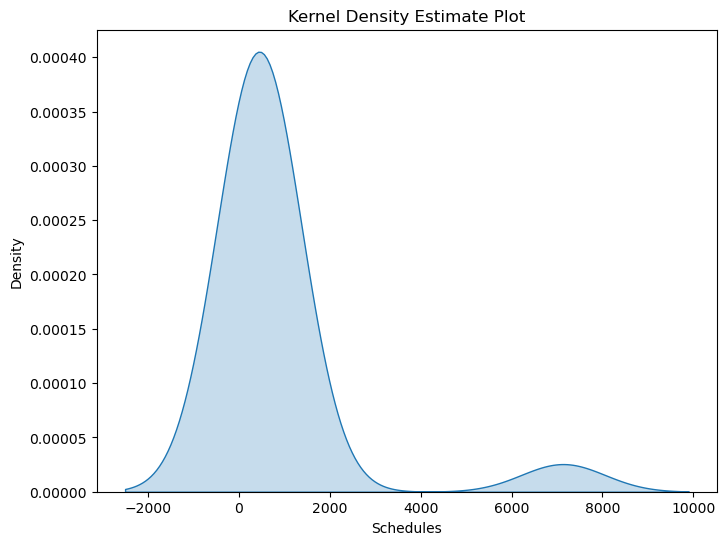

In [20]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['Schedules'])
sd = np.std(D1['Schedules'])

plt.figure(figsize=(8, 6))
sns.kdeplot(data=D1['Schedules'], shade=True)
plt.xlabel('Schedules')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot')
plt.show()

In [21]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,17.000000,17.000000,17,17,17,17.000000,17.000000
unique,NaN,NaN,15,17,17,NaN,NaN
top,NaN,NaN,5.1,54.66,57.39,NaN,NaN
freq,NaN,NaN,2,1,1,NaN,NaN
mean,839.176471,80.417647,NaN,NaN,NaN,9.000000,669.426471
std,1624.576069,7.919772,NaN,NaN,NaN,5.049752,1291.100103
min,257.000000,60.400000,NaN,NaN,NaN,1.000000,224.104000
25%,397.000000,78.300000,NaN,NaN,NaN,5.000000,297.432000
50%,470.000000,81.500000,NaN,NaN,NaN,9.000000,365.935000
75%,518.000000,85.300000,NaN,NaN,NaN,13.000000,421.999000


In [22]:
for col in D1.columns:
    D1[col] = pd.to_numeric(D1[col], errors='coerce')


In [23]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

# Display the updated Stats DataFrame
print(Stats)

Unnamed: 1    Schedules  Fleet Utilisation (%) % off road  vehicles  \
count         17.000000              17.000000                   17   
unique              NaN                    NaN                   15   
top                 NaN                    NaN                  5.1   
freq                NaN                    NaN                    2   
mean         839.176471              80.417647             5.858824   
std         1624.576069               7.919772             1.929721   
min          257.000000              60.400000                  1.8   
25%          397.000000              78.300000                  5.1   
50%          470.000000              81.500000                  6.0   
75%          518.000000              85.300000                  6.9   
max         7133.000000              91.800000                  9.9   

Unnamed: 1 Schedule kms (in lakh) Effective Kilometers (in lakh)    City_Id  \
count                          17                             17  17

<class 'numpy.int64'>


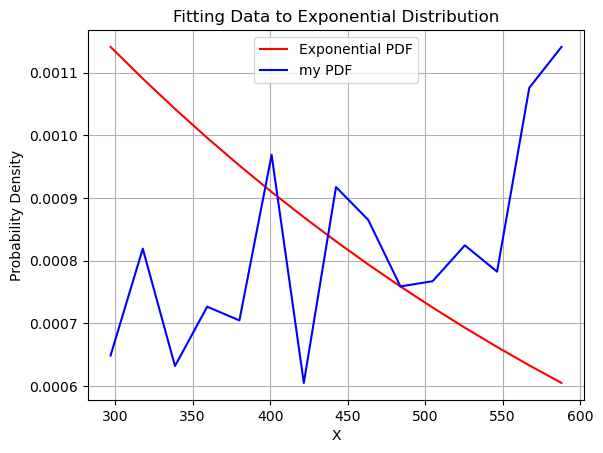

[0.00114123 0.00109064 0.00104229 0.00099608 0.00095193 0.00090973
 0.0008694  0.00083085 0.00079402 0.00075882 0.00072518 0.00069303
 0.00066231 0.00063295 0.00060489] [0.00064862 0.00081916 0.00063187 0.00072654 0.00070469 0.00096899
 0.00060489 0.00091756 0.00086507 0.00075894 0.00076726 0.00082453
 0.00078248 0.00107595 0.00114123]


In [24]:
from scipy.stats import expon

# Given data
data = D1['Schedules'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [25]:
#Left with:
'''
Correlation Analysis
Scatter Plot
Scatter heat map'''

'\nCorrelation Analysis\nScatter Plot\nScatter heat map'

In [26]:
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id',
       'EffPassDensity'],
      dtype='object', name='Unnamed: 1')

In [27]:
D1['Schedules'].values

array([ 556,  449,  568,  504,  518,  372,  588,  397,  424,  484,  479,
        446,  470,  324,  297,  257, 7133], dtype=int64)

In [28]:
Xfactor=D1['Schedules'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between Schedules & Effective Kilometers (in lakh):",R[0])

15 15
Coefficient of correlation between Schedules & Effective Kilometers (in lakh): 0.8664022791881317


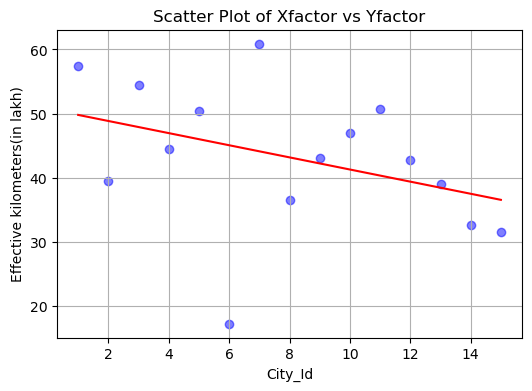

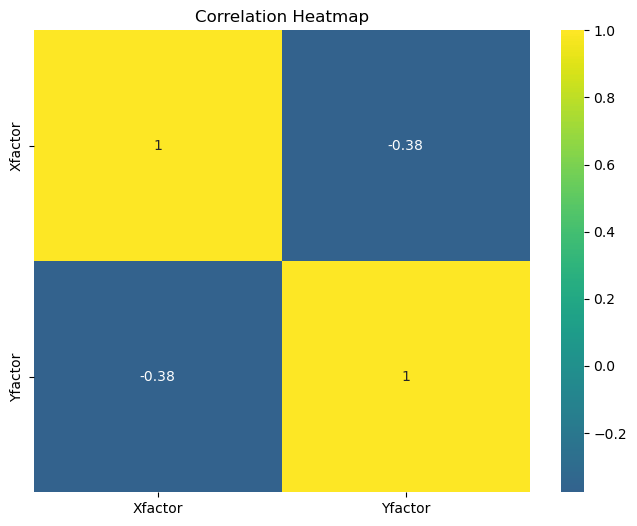

In [30]:
data = {
    'Xfactor': D1['City_Id'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('City_Id')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='viridis', center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()
